# Features selection for multiple linear regression

Following is an example taken from the masterpiece book *Introduction to Statistical Learning  by Hastie, Witten, Tibhirani, James*. It is based on an Advertising Dataset, available on the accompanying web site: http://www-bcf.usc.edu/~gareth/ISL/data.html

The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.  

Imaging being the Marketing responsible and you need to prepare a new advertising plan for next year. 

## Import Advertising data

In [1]:
import pandas as pd

In [2]:
ad = pd.read_csv("datasets/advertising.csv", index_col=0)

In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


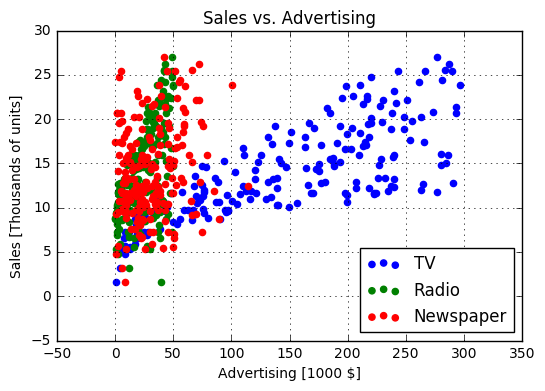

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(ad.TV, ad.Sales, color='blue', label="TV")
plt.scatter(ad.Radio, ad.Sales, color='green', label='Radio')
plt.scatter(ad.Newspaper, ad.Sales, color='red', label='Newspaper')

plt.legend(loc="lower right")
plt.title("Sales vs. Advertising")
plt.xlabel("Advertising [1000 $]")
plt.ylabel("Sales [Thousands of units]")
plt.grid()
plt.show()

In [7]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


([<matplotlib.axis.YTick at 0x10f7aa3c8>,
 <a list of 4 Text yticklabel objects>)

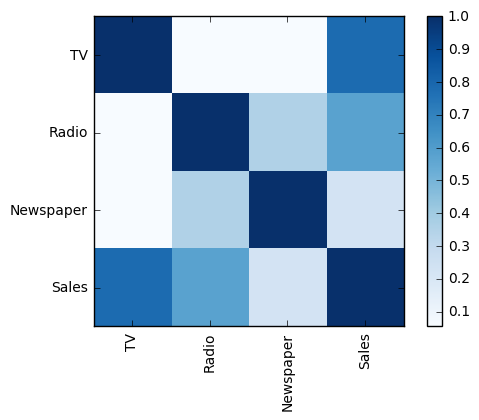

In [8]:
plt.imshow(ad.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(ad.columns))]
plt.xticks(tick_marks, ad.columns, rotation='vertical')
plt.yticks(tick_marks, ad.columns)

## Is there a relationship between sales and advertising?

First of all, we fit a regression line using the Ordinary Least Square algorithm, i.e. the line that minimises the squared differences between the actual Sales and the line itself.  
The multiple linear regression model takes the form:  
Sales = β0 + β1\*TV + β2\*Radio + β3\*Newspaper + ε, where Beta are the regression coefficients we want to find and epsilon is the error that we want to minimise.  
For this we use the statsmodels package and its *ols* function.

### Fit the LR model

In [9]:
import statsmodels.formula.api as sm

In [10]:
modelAll = sm.ols('Sales ~ TV + Radio + Newspaper', ad).fit()

These are the beta coefficients calculated:

In [11]:
modelAll.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

We interpret these results as follows: for a given amount of TV and newspaper advertising, spending an additional 1000 dollars on radio advertising leads to an increase in sales by approximately 189 units.  
In contrast, the coefficient for newspaper represents the average effect (negligible) of increasing newspaper spending by 1000 dollars while holding TV and radio fixed.

## Is at least one of the features useful in predicting Sales?

We use a hypothesis test to answer this question.  
The most common hypothesis test involves testing the null hypothesis of:  
H0: There is **no relationship** between the media and sales versus the alternative hypothesis 
Ha: There is **some relationship** between the media and sales.   

Mathematically, this corresponds to testing  
H0: β1 = β2 = β3 = β4 = 0
versus  
Ha: at least one βi is non-zero.

This hypothesis test is performed by computing the F-statistic

### The F-statistic

We need first of all the Residual Sum of Squares (RSS), i.e. the sum of all squared errors (differences between actual sales and predictions from the regression line). Remember this is the number that the regression is trying to minimise.

In [12]:
y_pred = modelAll.predict(ad)

In [13]:
import numpy as np
RSS = np.sum((y_pred - ad.Sales)**2)
RSS

556.825262902187

Now we need the Total Sum of Squares (TSS): the total variance in the response Y, and can be  thought of as the amount of variability inherent in the response before the regression is performed.  
The distance from any point in a collection of data, to the mean of the data, is the deviation.

In [14]:
y_mean = np.mean(ad.Sales) # mean of sales

In [15]:
TSS = np.sum((ad.Sales - y_mean)**2)
TSS

5417.148749999998

The F-statistic is the ratio between (TSS-RSS)/p and RSS/(n-p-1)

In [16]:
p=3 # we have three predictors: TV, Radio and Newspaper
n=200 # we have 200 data points (input samples)

In [17]:
F = ((TSS-RSS)/p) / (RSS/(n-p-1))
F

570.2707036590941

When there is no relationship between the response and predictors, one would expect the F-statistic to take on a value close to 1.  
On the other hand, if Ha is true, then we expect F to be greater than 1.  

In this case, F is far larger than 1:  at least one of the three advertising media must be related to sales. 

## How strong is the relationship?

Once we have rejected the null hypothesis in favor of the alternative hypothesis, it is natural to want to quantify the extent to which the model fits the data.  
The quality of a linear regression fit is typically assessed using two related quantities: the residual standard error (RSE) and the R2 statistic (the square of the correlation of the response and the variable, when close to 1 means high correlation).

In [18]:
RSE = np.sqrt((1/(n-2))*RSS); 
RSE

1.6769760888385672

In [19]:
np.mean(ad.Sales)

14.022500000000003

In [20]:
R2 = 1 - RSS/TSS; 
R2

0.8972106381789521

RSE is 1.68 units while the mean value for the response is 14.02, indicating a percentage error of roughly 12%.  
Second, the R2 statistic records the percentage of variability in the response that is explained by the predictors.  
The predictors explain almost 90% of the variance in sales. 

## Summary

*statsmodels* has a handy function that provides the above metrics in one single table:

In [21]:
modelAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 11 May 2017   Prob (F-statistic):           1.58e-96
Time:                        22:42:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One thing to note is that R2 (R-squared above) will always increase when more variables are added to the model, even if those variables are only weakly associated with the response.  
Therefore an adjusted R2 is provided, which is R2 adjusted by the number of predictors.

Another thing to note is that the summary table shows also a t-statistic and a p-value for each single feature.  
These provide information about whether each individual predictor is related to the response (high t-statistic or low p-value).

But be careful looking only at these individual p-values instead of looking at the overall F-statistic. It seems likely that if any one of the p-values for the individual features is very small, then at least one of the predictors is related to the response. However, this logic is flawed, especially when you have many predictors; statistically about 5 % of the p-values will be below 0.05 by chance (this is the effect infamously leveraged by the so-called p-hacking).    
The F-statistic does not suffer from this problem because it adjusts for the number of predictors. 

## Which media contribute to sales?

To answer this question, we could examine the p-values associated with each predictor’s t-statistic. In the multiple linear regression above, the p-values for TV and radio are low, but the p-value for newspaper is not. This suggests that only TV and radio are related to sales. 

But as just seen, if p is large then we are likely to make some false discoveries.

The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as **variable /feature selection**. 

Ideally, we could perform the variable selection by trying out a lot of different models, each containing a different subset of the features.   
We can then select the best model out of all of the models that we have considered (for example, the model with the smallest RSS and the biggest R2). Other used metrics are the Mallow’s Cp, Akaike information criterion (AIC), Bayesian information criterion (BIC), and adjusted R2. All of them are visible in the summary model.

In [22]:
def evaluateModel (model):
    print("RSS = ", ((ad.Sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

Unfortunately, there are a total of 2^p models that contain subsets of p variables.  
For three predictors, it would still be manageable, only 8 models to fit and evaluate but as p increases, the number of models grows exponentially.

Instead, we can use other approaches. The three classical ways are the forward selection (start with no features and add one after the other until a threshold is reached); the backward selection (start with all features and remove one by one) and the mixed selection (a combination of the two).  
We try here the **forward selection**.

### Forward selection

We start with a null model (no features), we then fit three (p=3) simple linear regressions and add to the null model the variable that results in the lowest RSS. 

In [23]:
modelTV = sm.ols('Sales ~ TV', ad).fit()
modelTV.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


In [24]:
evaluateModel(modelTV)

RSS =  2102.5305831313517
R2 =  0.61187505085


The model containing only TV as a predictor had an RSS=2103 and an R2 of 0.61

In [25]:
modelRadio = sm.ols('Sales ~ Radio', ad).fit()
modelRadio.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,9.3116,0.563,16.542,0.000,8.202 10.422
Radio,0.2025,0.020,9.921,0.000,0.162 0.243


In [26]:
evaluateModel(modelRadio)

RSS =  3618.4795490250867
R2 =  0.332032455445


In [27]:
modelPaper = sm.ols('Sales ~ Newspaper', ad).fit()
modelPaper.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,12.3514,0.621,19.876,0.000,11.126 13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022 0.087


In [28]:
evaluateModel(modelPaper)

RSS =  5134.804544111938
R2 =  0.0521204454443


The lowest RSS and the highest R2 are for the TV medium.  
Now we have a best model M1 which contains TV advertising.  
We then add to this M1 model the variable that results
in the lowest RSS for the new two-variable model.  
This approach is continued until some stopping rule is satisfied.

In [29]:
modelTVRadio = sm.ols('Sales ~ TV + Radio', ad).fit()
modelTVRadio.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,2.9211,0.294,9.919,0.000,2.340 3.502
TV,0.0458,0.001,32.909,0.000,0.043 0.048
Radio,0.1880,0.008,23.382,0.000,0.172 0.204


In [30]:
evaluateModel(modelTVRadio)

RSS =  556.9139800676182
R2 =  0.897194261083


In [31]:
modelTVPaper = sm.ols('Sales ~ TV + Newspaper', ad).fit()
modelTVPaper.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,5.7749,0.525,10.993,0.000,4.739 6.811
TV,0.0469,0.003,18.173,0.000,0.042 0.052
Newspaper,0.0442,0.010,4.346,0.000,0.024 0.064


In [32]:
evaluateModel(modelTVPaper)

RSS =  1918.5618118968273
R2 =  0.645835493829


Well, the model with TV AND Radio greatly decreased RSS and increased R2, so that will be our M2 model.

Now, we have only three variables here. We can decide to stop at M2 or use an M3 model with all three variables.  
Recall that we already fitted and evaluated a model with all features, just at the beginning. 

In [33]:
evaluateModel(modelAll)

RSS =  556.825262902187
R2 =  0.897210638179


M3 is *slightly* better than M2 (but remember that R2 always increases when adding new variables) so we call the approach completed and decide that the M2 model with TV and Radio is the good compromise. Adding the newspaper could possibly overfits on new test data.  
Next year no budget for newspaper advertising and that amount will be used for TV and Radio instead.

In [34]:
modelTVRadio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 11 May 2017   Prob (F-statistic):           4.83e-98
Time:                        22:42:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting the model

The M2 model has two variables therefore can be plotted as a plane in a 3D chart.

In [35]:
modelTVRadio.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

The M2 model can be described by this equation:  
Sales = 0.19 * Radio + 0.05 * TV + 2.9  which I can write as:  
 0.19*x + 0.05*y - z + 2.9 = 0  
Its normal is (0.19, 0.05, -1)  
and a point on the plane is (-2.9/0.19,0,0) = (-15.26,0,0)

In [36]:
normal = np.array([0.19,0.05,-1])
point  = np.array([-15.26,0,0])
# a plane is a*x + b*y +c*z + d = 0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -np.sum(point*normal) # dot product
# create x,y
x, y = np.meshgrid(range(50), range(300))
# calculate corresponding z
z = (-normal[0]*x - normal[1]*y - d)*1./normal[2]

Let's plot the actual values as red points and the model predictions as a cyan plane:

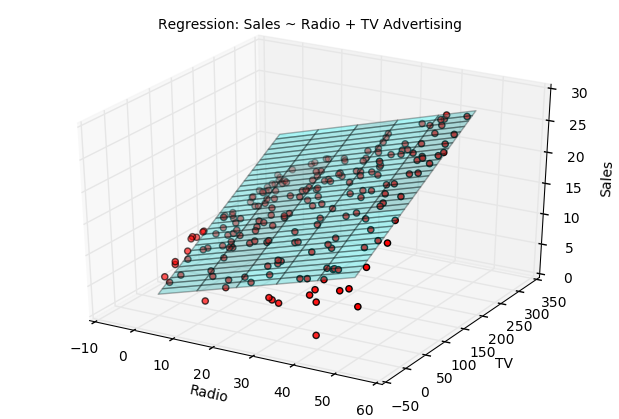

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.suptitle('Regression: Sales ~ Radio + TV Advertising')
ax = Axes3D(fig)

ax.set_xlabel('Radio')
ax.set_ylabel('TV')
ax.set_zlabel('Sales')
ax.scatter(ad.Radio, ad.TV, ad.Sales, c='red')

ax.plot_surface(x,y,z, color='cyan', alpha=0.3)


## Is there synergy among the advertising media?

Adding radio to the model leads to a substantial improvement in R2. This implies that a model that uses TV and radio expenditures to predict sales is substantially better than one that uses only TV advertising. 

In our previous analysis of the Advertising data, we concluded that both TV and radio seem to be associated with sales. The linear models that formed the basis for this conclusion assumed that the effect on sales of increasing one advertising medium is independent of the amount spent on the other media.  
For example, the linear model states that the average effect on sales of a one-unit increase in TV is always β1, regardless of the amount spent on radio.
However, this simple model may be incorrect. Suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope term for TV should increase as radio increases. In this situation, given a fixed budget of $100K spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio.  
In marketing, this is known as a **synergy effect**. The figure above suggests that such an effect may be present in the advertising data. Notice that when levels of either TV or radio are low, then the true sales are lower than predicted by the linear model. But when advertising is split between the two media, then the model tends to underestimate sales.

In [38]:
modelSynergy = sm.ols('Sales ~ TV + Radio + TV*Radio', ad).fit()
modelSynergy.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,6.7502,0.248,27.233,0.000,6.261 7.239
TV,0.0191,0.002,12.699,0.000,0.016 0.022
Radio,0.0289,0.009,3.241,0.001,0.011 0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001 0.001


The results strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects. The p-value for the interaction term, TV×radio, is extremely low, indicating that there is strong evidence for Ha : β3 not zero. In other words, it is clear that the true relationship is not additive. 

In [39]:
evaluateModel(modelSynergy)

RSS =  174.48338262772737
R2 =  0.967790549848


The R2 for this model is 96.8 %, compared to only 89.7% for the model M2 that predicts sales using TV and radio without an interaction term. This means that (96.8 − 89.7)/(100 − 89.7) = 69% of the variability in sales that remains after fitting the additive model has been explained by the interaction term.

 A linear model that uses radio, TV, and an interaction between the two to predict sales takes the form:  
 sales = β0 + β1 × TV + β2 × radio + β3 × (radio×TV) + ε

In [40]:
modelSynergy.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TV:Radio     0.001086
dtype: float64

We can interpret β3 as the increase in the effectiveness of TV advertising for a one unit increase in radio advertising (or vice-versa).